# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,recall_score,accuracy_score,precision_score,confusion_matrix,f1_score

# 2. Data Preprocessing

1. Reading Dataset

In [2]:
data=pd.read_csv('heart.csv')


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


2. Dealing with Missing values

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

3. Train Test Split

In [7]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

4. Scaling

In [9]:
s=StandardScaler()

In [10]:
x_train_new=s.fit_transform(x_train)
x_test_new=s.transform(x_test)

# 3. EDA

In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


2. Correlation matrix

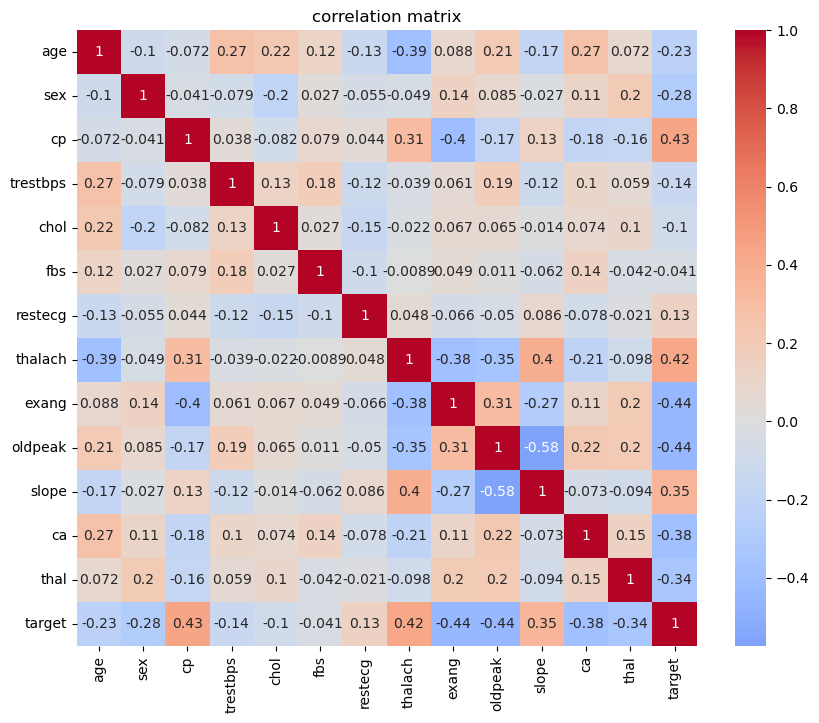

In [12]:
correlation_matrix=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',center=0)
plt.title('correlation matrix')
plt.show()

2. Data Visualisation

<AxesSubplot:xlabel='target', ylabel='count'>

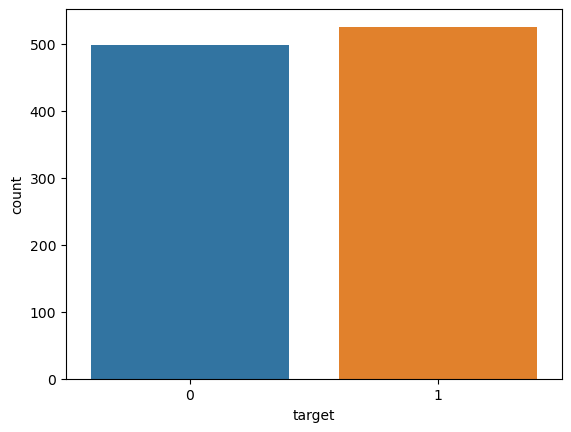

In [13]:
#countplot of target variable
sns.countplot(x='target',data=data)

<AxesSubplot:xlabel='target', ylabel='count'>

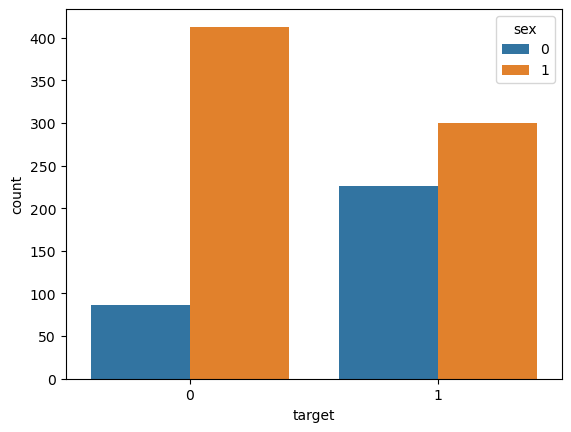

In [14]:
#countplot of target with legend sex
sns.countplot(x='target',data=data, hue='sex')

<AxesSubplot:ylabel='Frequency'>

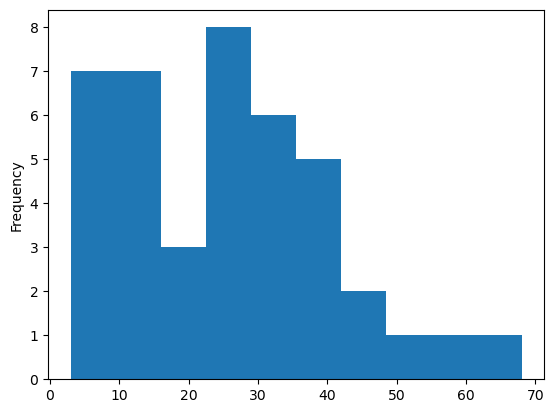

In [15]:
#histogram of age
data['age'].value_counts().plot.hist()

<AxesSubplot:xlabel='cp', ylabel='count'>

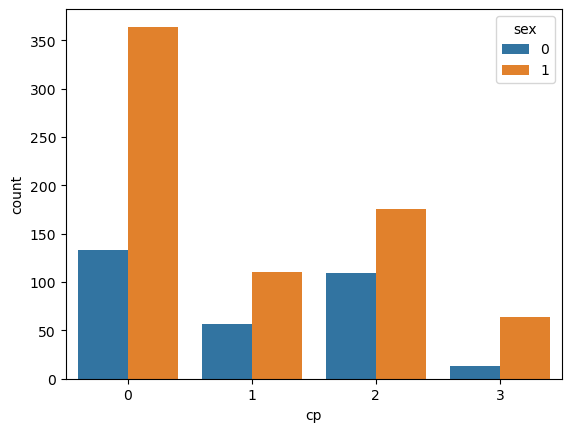

In [35]:
sns.countplot(x=data['cp'],hue=data['sex'])

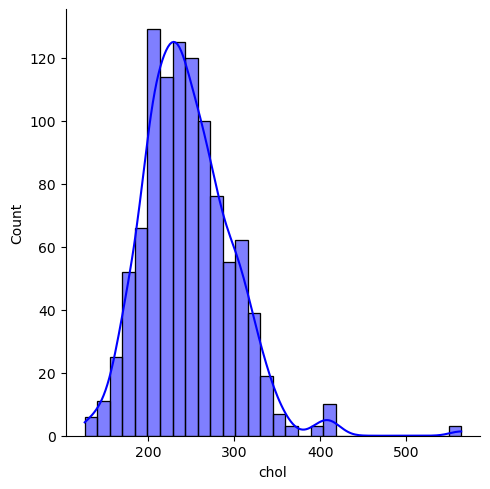

In [36]:
sns.displot(data['chol'],kde=True,color='blue',bins=30)

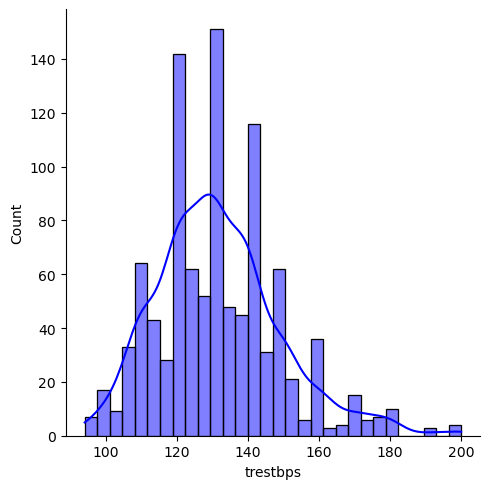

In [37]:
sns.displot(data['trestbps'].dropna(),kde=True,color='blue',bins=30)

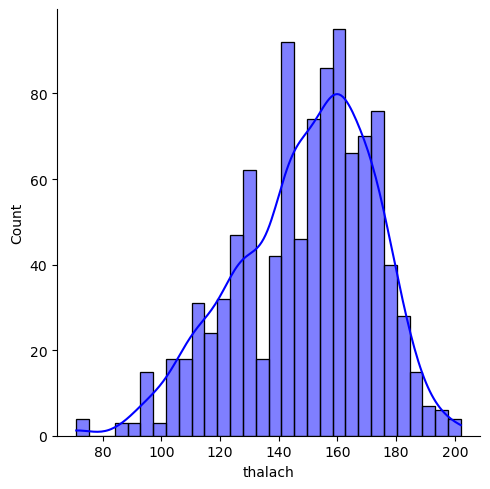

In [38]:
sns.displot(data['thalach'],kde=True,color='blue',bins=30)

# 4. ML Models 

1. Decision Tree Classifier

In [39]:
dtree=DecisionTreeClassifier(random_state=42, max_depth=6)
dtree.fit(x_train_new,y_train)
# Predict on dataset which model has not seen before
y_pred1=dtree.predict(x_test_new)

2. KNN

In [40]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train_new, y_train)
# Predict on dataset which model has not seen before
y_pred2=knn.predict(x_test_new)

C:\Users\SHIVAM\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


3. Naive Bayes

In [41]:
gnb = GaussianNB()
gnb.fit(x_train_new, y_train)
# Predict on dataset which model has not seen before
y_pred = gnb.predict(x_test_new)

# 5. Model Evaluation

Accuracy details for Decision Tree Classifier

In [42]:
print("Decision Tree Classifier Prediction details: \n")
print("Accuracy Score  :",accuracy_score(y_test,y_pred1))
print("Precision Score :",precision_score(y_test,y_pred1))
print("Recall Score    :",recall_score(y_test,y_pred1))
print("  f1 Score      :",f1_score(y_test,y_pred1))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred1))
print("Classification Matrix :\n",classification_report(y_test,y_pred1))

Decision Tree Classifier Prediction details: 

Accuracy Score  : 0.8754863813229572
Precision Score : 0.8394160583941606
Recall Score    : 0.92
  f1 Score      : 0.8778625954198473
Confusion Matrix:
 [[110  22]
 [ 10 115]]
Classification Matrix :
               precision    recall  f1-score   support

           0       0.92      0.83      0.87       132
           1       0.84      0.92      0.88       125

    accuracy                           0.88       257
   macro avg       0.88      0.88      0.88       257
weighted avg       0.88      0.88      0.88       257



Accuracy details for KNN

In [43]:
print("KNN Prediction details: \n")
print("Accuracy Score  :",accuracy_score(y_test,y_pred2))
print("Precision Score :",precision_score(y_test,y_pred2))
print("Recall Score    :",recall_score(y_test,y_pred2))
print("  f1 Score      :",f1_score(y_test,y_pred2))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred2))
print("Classification Matrix :\n",classification_report(y_test,y_pred2))

KNN Prediction details: 

Accuracy Score  : 0.8210116731517509
Precision Score : 0.7841726618705036
Recall Score    : 0.872
  f1 Score      : 0.8257575757575759
Confusion Matrix:
 [[102  30]
 [ 16 109]]
Classification Matrix :
               precision    recall  f1-score   support

           0       0.86      0.77      0.82       132
           1       0.78      0.87      0.83       125

    accuracy                           0.82       257
   macro avg       0.82      0.82      0.82       257
weighted avg       0.83      0.82      0.82       257



Accuracy details for Naive Bayes

In [44]:
print("Naive Bayes Prediction details: \n")
print("Accuracy Score  :",accuracy_score(y_test,y_pred))
print("Precision Score :",precision_score(y_test,y_pred))
print("Recall Score    :",recall_score(y_test,y_pred))
print("  f1 Score      :",f1_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Matrix :\n",classification_report(y_test,y_pred))

Naive Bayes Prediction details: 

Accuracy Score  : 0.7937743190661478
Precision Score : 0.75
Recall Score    : 0.864
  f1 Score      : 0.8029739776951673
Confusion Matrix:
 [[ 96  36]
 [ 17 108]]
Classification Matrix :
               precision    recall  f1-score   support

           0       0.85      0.73      0.78       132
           1       0.75      0.86      0.80       125

    accuracy                           0.79       257
   macro avg       0.80      0.80      0.79       257
weighted avg       0.80      0.79      0.79       257



Total accuracy details

In [45]:
result=pd.DataFrame({'Model':['Decision Tree Classifier','KNN','Naive Bayes'],'Accuracy':[recall_score(y_pred1,y_test)*100,recall_score(y_pred2,y_test)*100,recall_score(y_pred,y_test)*100]})

In [46]:
result

,Model,Accuracy
0,Decision Tree Classifier,83.941606
1,KNN,78.417266
2,Naive Bayes,75.000000


# 6. Cross Valiation

In [47]:
from sklearn.model_selection import cross_val_score

Cross validation of Decision tree classifier

In [48]:
scores1 = cross_val_score(dtree, x_train_new, y_train, cv=5)
scores1

array([0.95454545, 0.88311688, 0.90909091, 0.94771242, 0.89542484])

Cross validation of KNN

In [49]:
scores2 = cross_val_score(knn, x_train_new, y_train, cv=5)
scores2

C:\Users\SHIVAM\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\SHIVAM\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

array([0.92207792, 0.85064935, 0.87012987, 0.83660131, 0.81045752])

Cross validation of Naive Bayes

In [50]:
scores3 = cross_val_score(gnb, x_train_new, y_train, cv=5)
scores3

array([0.86363636, 0.7987013 , 0.86363636, 0.88235294, 0.79084967])

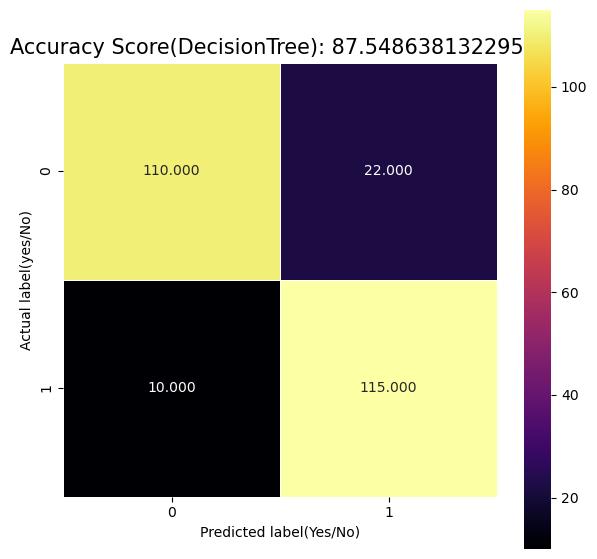

In [51]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred1)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'inferno');
plt.ylabel('Actual label(yes/No)');
plt.xlabel('Predicted label(Yes/No)');
all_sample_title = 'Accuracy Score(DecisionTree): {0}'.format(accuracy_score(y_test,y_pred1)*100)
plt.title(all_sample_title, size = 15);

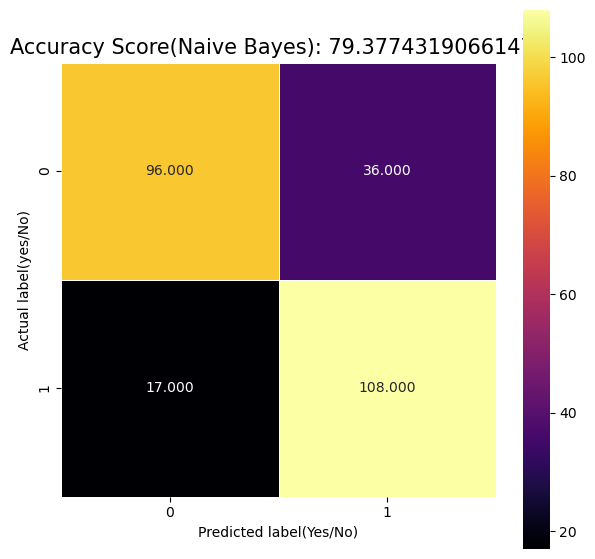

In [52]:
cm=metrics.confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'inferno');
plt.ylabel('Actual label(yes/No)');
plt.xlabel('Predicted label(Yes/No)');
all_sample_title = 'Accuracy Score(Naive Bayes): {0}'.format(accuracy_score(y_test,y_pred)*100)
plt.title(all_sample_title, size = 15);

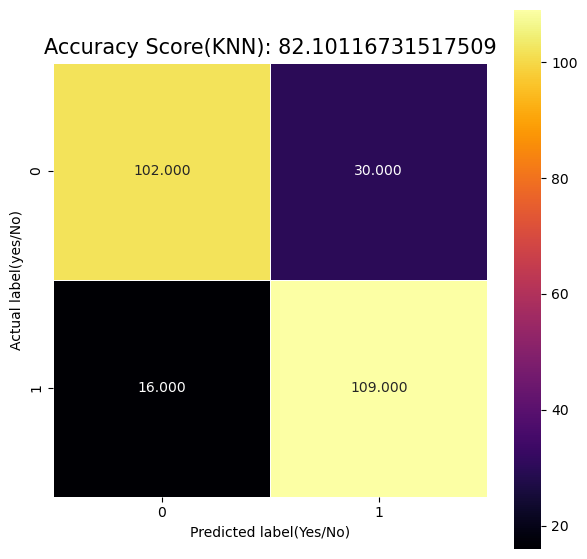

In [53]:
cm=metrics.confusion_matrix(y_test,y_pred2)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'inferno');
plt.ylabel('Actual label(yes/No)');
plt.xlabel('Predicted label(Yes/No)');
all_sample_title = 'Accuracy Score(KNN): {0}'.format(accuracy_score(y_test,y_pred2)*100)
plt.title(all_sample_title, size = 15);